<a href="https://colab.research.google.com/github/Deb-joe/Data-Analysis/blob/main/Chi-square_Test_of_Independence_for_association_between_Studyhours_PrepTime_PassedExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
data = {"StudyHours": [2.5, 1.5, 3, 2, 4, 5, 1, 3.5, 2.5, 4],
        "PrepCourse": [0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
        "PassedExam": [0, 0, 1, 0, 1, 1, 0, 1, 0, 1]}
df = pd.DataFrame(data)
df

,StudyHours,PrepCourse,PassedExam
0,2.5,0,0
1,1.5,0,0
2,3.0,1,1
3,2.0,0,0
4,4.0,1,1
5,5.0,1,1
6,1.0,0,0
7,3.5,1,1
8,2.5,0,0
9,4.0,1,1


#Checking whether ContinuousCols (Study Hours) is related with Categorical Predictor (Pass Exam)


In [2]:
#Defining a function to find the statistical relationship with all the categorical variables
def FunctionANOVA(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    #Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoricalGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        ANOVAResults = f_oneway(*CategoricalGroupLists)

        # If the ANOVA p-value is <0.05, that means we reject null hypothesis
        if (ANOVAResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| p-value:', ANOVAResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is not correlated with', TargetVariable, '| p-value:', ANOVAResults[1])

    return(SelectedPredictors)

#Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['StudyHours']
FunctionANOVA(inpData=df, TargetVariable='PassedExam', ContinuousPredictorList=ContinuousVariables)


##### ANOVA Results ##### 

StudyHours is correlated with PassedExam | p-value: 0.0019266321241544415


['StudyHours']

#Relationship Exploration: Categorical vs Continuous -- Box Plot
When Target Variable is Categorical and predictor variable is Continuous we analyze the relation using bar/box plot and measure the strength of relation using ANOVA test

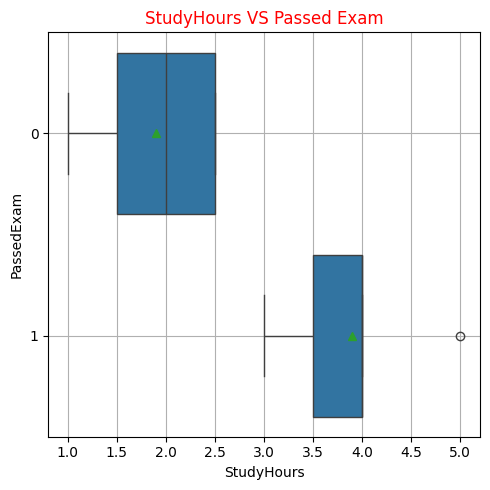

In [3]:
#**Check for Box plots, Correlation plots for the continuous columns**
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure(figsize=(5,5))
sns.boxplot(x="StudyHours",y='PassedExam', data=df,showmeans=True, orient="h")
plt.title("StudyHours VS Passed Exam",color='Red')
plt.grid()
plt.tight_layout()

#Checking relationship between Column PrepatoryCourse and Exam Passed using CHi Sq Test since both are categorical Column

In [5]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

CategoricalVariables=["PrepCourse"]

# Calling the function
FunctionChisq(inpData=df,
              TargetVariable="PassedExam",
              CategoricalVariablesList= CategoricalVariables)

PrepCourse is correlated with PassedExam | P-Value: 0.01141203638600166


['PrepCourse']

#Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

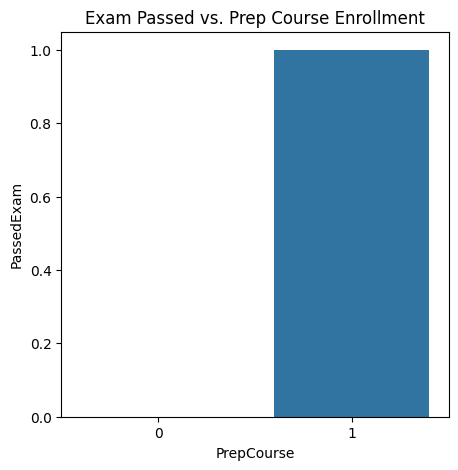

In [6]:
#bivariate plot-political.knowledge
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(5,5))
sns.barplot(x="PrepCourse",  y="PassedExam", data=df)

# Customize the plot (optional)

plt.xlabel("PrepCourse")
plt.ylabel("PassedExam")
plt.title("Exam Passed vs. Prep Course Enrollment")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

#Logistic Regression Model

In [8]:
# Separate Target Variable and Predictor Variables
TargetVariable='PassedExam'
Predictors=["StudyHours","PrepCourse"]

X=df[Predictors].values
y=df[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=20)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
import statsmodels as sm
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['PassedExam']=y_test
TestingData['Predicted_PassedExam']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))



# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#rint('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

   StudyHours  PrepCourse  PassedExam  Predicted_PassedExam
0         3.5         1.0           1                     1
1         1.5         0.0           0                     0
2         2.5         0.0           0                     0
3         5.0         1.0           1                     1
4         2.5         0.0           0                     0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

[[4 0]
 [0 3]]
Accuracy of the model on Testing Sample Data: 1.0


In [9]:
from sklearn.metrics import classification_report , confusion_matrix

# Model coefficients (weights)
model = LogisticRegression()
model.fit(X, y)
print("Model coefficients (weights):")
print(model.coef_)  # Array of coefficients for each feature

# Classification report
print("Classification report:")
y_pred = model.predict(X)  # Predicted labels
print(classification_report(y, y_pred))  # Detailed report on precision, recall, F1-score, etc.

# Confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y, y_pred))  # Shows true vs. predicted classifications


print("Model intercept (bias):")
print(model.intercept_)  # Single value for the intercept

Model coefficients (weights):
[[1.22263715 0.90970551]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion matrix:
[[5 0]
 [0 5]]
Model intercept (bias):
[-3.98076759]


We can analyse from the above model that students who have taken the prepatory courses have more chance in passing the exam and need to study minimum 3 hrs in order to have more chance in passing the exam.